In [80]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt

In [81]:
# Load the data
#select features and target variable
#encode catergorical variables if needed
#split the data into training and testing sets
#Feature scaling
#initialize the classifier
#train the classifier
#make predictions
#evaluate the model

In [82]:
#firstlty, we need to load the data

df = pd.read_csv('bank-additional-full.csv', delimiter=';')


In [83]:
#preprocessing the data

df_preprocessed = pd.get_dummies(df, drop_first=True)

In [84]:
#split the data into features and target variable
X = df_preprocessed.drop('y_yes', axis=1)
y = df_preprocessed['y_yes']

In [85]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
#initialize the classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [87]:
#predict on test set and evaluate the model performance
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9119932022335518


In [88]:
#as the task suggests we now have to analyze the feature importance
#we can use SHAP for this

feature_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

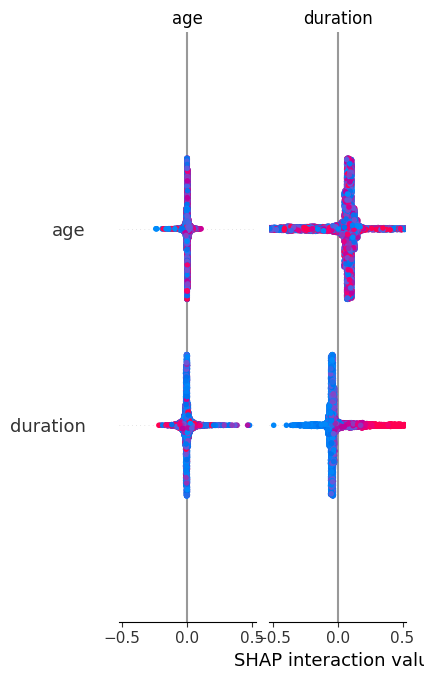

In [89]:
explainer = shap.TreeExplainer(model=clf, model_output='raw', feature_perturbation='interventional')
shap_values = explainer.shap_values(X_test, approximate=True)

shap.summary_plot(shap_values, X_test, plot_type='bar')

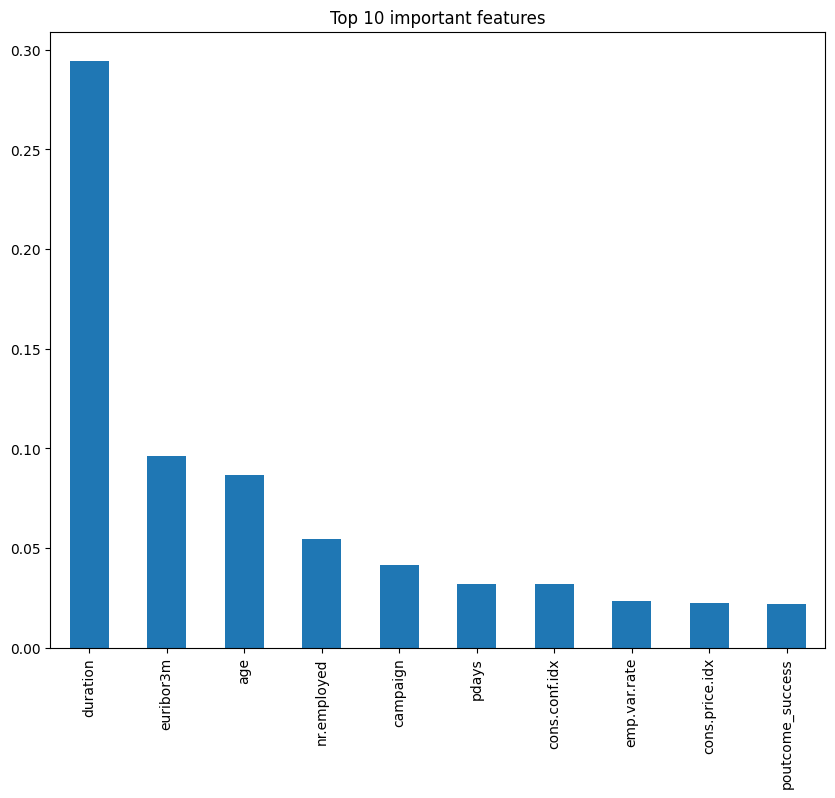

In [90]:
#plot global feature importance
plt.figure(figsize=(10, 8))
feature_importance.iloc[:10].plot(kind='bar')
plt.title('Top 10 important features')
plt.show()